<a href="https://colab.research.google.com/github/JulioBaroni/DADOS-ENGIE/blob/main/C%C3%B3pia_de_Beta_ENGIE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:          Retorno_ENGIE   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     512.7
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.39e-94
Time:                        01:31:14   Log-Likelihood:                 3367.8
No. Observations:                1184   AIC:                            -6732.
Df Residuals:                    1182   BIC:                            -6722.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.417e-05      0.000      0.

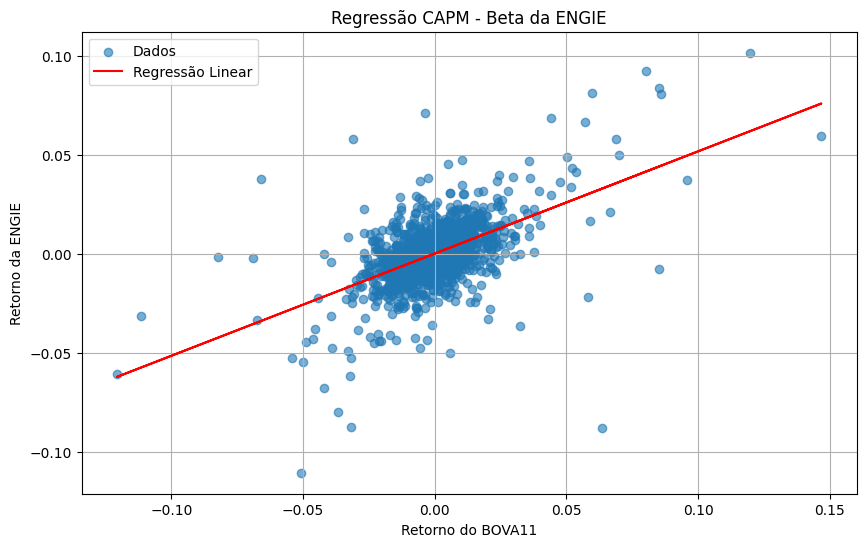

In [ ]:
# 1. Instalar biblioteca necessária
!pip install openpyxl --quiet

# 2. Importar bibliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 3. Link direto do GitHub (link RAW)
url = 'https://github.com/JulioBaroni/DADOS-ENGIE/raw/main/BASE%20DE%20DADOS%20-%20ENGIE.xlsx'

# 4. Carregar dados
df = pd.read_excel(url, sheet_name='PREÇO')

# 5. Converter data
df['Data'] = pd.to_datetime(df['Data'])

# 6. Calcular retornos logarítmicos
df['Retorno_ENGIE'] = np.log(df['ENGIE'] / df['ENGIE'].shift(1))
df['Retorno_BOVA11'] = np.log(df['BOVA11'] / df['BOVA11'].shift(1))

# 7. Remover valores ausentes
df = df.dropna()

# 8. Rodar regressão CAPM
X = sm.add_constant(df['Retorno_BOVA11'])  # Adiciona intercepto
modelo = sm.OLS(df['Retorno_ENGIE'], X).fit()

# 9. Resultado da regressão
print(modelo.summary())

# 10. Mostrar beta
beta = modelo.params['Retorno_BOVA11']
print(f"\n➡️ O beta estimado da ENGIE é: {beta:.4f}")

# 11. Gráfico da regressão
plt.figure(figsize=(10, 6))
plt.scatter(df['Retorno_BOVA11'], df['Retorno_ENGIE'], alpha=0.6, label='Dados')
plt.plot(df['Retorno_BOVA11'], modelo.predict(X), color='red', label='Regressão Linear')
plt.xlabel('Retorno do BOVA11')
plt.ylabel('Retorno da ENGIE')
plt.title('Regressão CAPM - Beta da ENGIE')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 1. Importar bibliotecas
!pip install openpyxl --quiet
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 2. Ler o arquivo diretamente do GitHub (formato raw)
url = 'https://github.com/JulioBaroni/DADOS-ENGIE/raw/main/BASE%20DE%20DADOS%20-%20ENGIE.xlsx'
df = pd.read_excel(url, sheet_name='PREÇO')

# 3. Calcular os retornos logarítmicos
df['Retorno_ENGIE'] = np.log(df['ENGIE'] / df['ENGIE'].shift(1))
df['Retorno_BOVA11'] = np.log(df['BOVA11'] / df['BOVA11'].shift(1))
df = df.dropna()

# 4. Estimar o beta via regressão linear
X = sm.add_constant(df['Retorno_BOVA11'])  # Adiciona constante
modelo = sm.OLS(df['Retorno_ENGIE'], X).fit()
beta = modelo.params['Retorno_BOVA11']

# 5. Definir premissas do CAPM
rf = 0.11         # taxa livre de risco (11% ao ano)
rm = 0.12         # retorno esperado do mercado (conservador: 12% ao ano)

# 6. Calcular retorno esperado pelo CAPM
re = rf + beta * (rm - rf)
print(f"➡️ Retorno esperado da ENGIE via CAPM: {re:.2%}")


➡️ Retorno esperado da ENGIE via CAPM: 11.52%


In [ ]:
import pandas as pd

# Parâmetros fixos
rf = 0.11  # taxa livre de risco (11% ao ano)

# Diferentes betas estimados (cenário conservador, base e agressivo)
betas = [0.45, 0.5166, 0.60]

# Diferentes retornos esperados do mercado (em % ao ano)
retornos_mercado = [0.10, 0.12, 0.14]

# Lista para armazenar os resultados
resultado_sensibilidade = []

# Calcular retorno esperado pelo CAPM para cada combinação
for beta in betas:
    for rm in retornos_mercado:
        re = rf + beta * (rm - rf)
        resultado_sensibilidade.append({
            "Beta": round(beta, 4),
            "Retorno do Mercado": f"{rm:.0%}",
            "Retorno Esperado CAPM": f"{re:.2%}"
        })

# Exibir os resultados em formato de tabela
df_sensibilidade = pd.DataFrame(resultado_sensibilidade)
df_sensibilidade


,Beta,Retorno do Mercado,Retorno Esperado CAPM
0,0.4500,10%,10.55%
1,0.4500,12%,11.45%
2,0.4500,14%,12.35%
3,0.5166,10%,10.48%
4,0.5166,12%,11.52%
5,0.5166,14%,12.55%
6,0.6000,10%,10.40%
7,0.6000,12%,11.60%
8,0.6000,14%,12.80%
